## Résumé
Dénicher les tumeurs au cerveau le plus tôt possible est essentiel pour la survie des patients. Raison pour laquelle des nouvelles techniques de détection automatique sont développées au fil du temps. La tumeur du cerveau est une maladie critique. Les médecins travaillent dur pour détecter et traiter la tumeur afin de sauver la vie des patients. La détection de la tumeur prend beaucoup de temps pour les médecins et les diagnostics peuvent changer d’un médecin à un autre. Le deep learning est une technique permettant de détecter la tumeur cérébrale utilisant les réseaux de neurones a convolution à l’aide des images IRM.
 Ce travail décrit la détection des tumeurs cérébrales à l'aide des réseaux de neurones convolutifs « CNN ». La détection des tumeurs cérébrales est notre objectif pour créer ce système afin de sauver la vie des patients. Donc, notre système se base sur trois étapes nécessaires à savoir : Prétraitement d'images, extraction de caractéristiques avec le modèle CNN. Et enfin, Les couches entièrement connectées de CNN pour classifier l'IRM en normale ou tumorale.


## **Lien de données**
-  https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

## **1.Importation des Bibliothèques Nécessaires**

- **Numpy** (`np`): utilisé pour les opérations numériques et la manipulation de tableaux.
- **Torch** (`torch`): bibliothèque principale pour le deep learning avec PyTorch.
- **Torch Datasets**:
  - `Dataset`: classe de base pour la création de datasets personnalisés.
  - `DataLoader`: pour charger les données par lots.
  - `ConcatDataset`: pour combiner plusieurs datasets.
- **Glob** (`glob`): pour récupérer des chemins de fichiers correspondant à un motif spécifique.
- **Matplotlib** (`plt`): utilisé pour la création de graphiques et la visualisation des données.
- **Scikit-learn Metrics**:
  - `confusion_matrix`: pour calculer la matrice de confusion.
  - `accuracy_score`: pour calculer la précision du modèle.
- **OpenCV** (`cv2`): pour le traitement d'images et de vidéos.
- **Seaborn** (`sns`): pour visualiser des matrices de confusion avec des heatmaps.
- **Scikit-learn Model Selection**:
  - `train_test_split`: pour diviser les données en ensembles d'entraînement et de test.
- **torch.nn** : ce module de PyTorch fournit des classes pour construire des blocs de réseaux de neurones, comme des couches convolutives, des couches entièrement connectées, des fonctions d'activation, etc.
- **torch.nn.functional** : ce module contient des fonctions qui sont utilisées pour appliquer diverses opérations dans les réseaux de neurones, comme les fonctions d'activation (ReLU, Sigmoid, etc.), les convolutions, le pooling, et bien d'autres.

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F

## **2.Chargement et prétraitement des images**

### **1. Initialisation des listes**
- `with_tumor`: liste pour stocker les images contenant une tumeur.
- `no_tumor`: liste pour stocker les images ne contenant pas de tumeur.

### **2. Chargement et redimensionnement des images**
- **Étape 1** : charger les images de tumeurs depuis le dossier `./data/yes/`.
- **Étape 2** : redimensionner chaque image à 128x128 pixels.
- **Étape 3** : convertir les canaux de couleur de BGR (utilisé par OpenCV) à RGB.
- **Étape 4** : ajouter l'image traitée à la liste `with_tumor`.

- **Étape 5** : répéter les mêmes étapes pour les images sans tumeur depuis le dossier `./data/no/`, et les ajouter à la liste `no_tumor`.

### **3. Conversion des listes en tableaux NumPy**
- **no_tumor** : conversion des images sans tumeur en tableau NumPy.
- **with_tumor** : conversion des images avec tumeur en tableau NumPy.

### **4. Création des étiquettes**
- **no_tumor_label** : étiquettes pour les images sans tumeur (1 pour chaque image).
- **with_tumor_label** : étiquettes pour les images avec tumeur (0 pour chaque image).

### **5. Concatenation des données**
- **All** : concatenation des tableaux `with_tumor` et `no_tumor` en un seul tableau.


In [25]:
with_tumor = []
no_tumor = []
for f in glob.iglob("./data/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    with_tumor.append(img)

for f in glob.iglob("./data/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    no_tumor.append(img)
# images
no_tumor = np.array(no_tumor)
with_tumor = np.array(with_tumor)
# labels
no_tumor_label = np.ones(no_tumor.shape[0], dtype=np.float32)
with_tumor_label = np.zeros(with_tumor.shape[0], dtype=np.float32)
All = np.concatenate((with_tumor, no_tumor))

## **3.Exploration de données**

In [26]:
# Afficher la forme du tableau All
All.shape

(245, 128, 128, 3)

où 245 est le nombre total d'images, 128x128 est la taille des images, et 3 représente les canaux de couleur RGB.

In [27]:
All[100]

array([[[255, 255, 255],
        [251, 251, 251],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [246, 246, 246],
        [249, 249, 249]],

       [[242, 242, 242],
        [ 99,  99,  99],
        [ 44,  44,  44],
        ...,
        [ 50,  50,  50],
        [ 98,  98,  98],
        [253, 253, 253]],

       [[250, 250, 250],
        [ 78,  78,  78],
        [ 29,  29,  29],
        ...,
        [ 23,  23,  23],
        [ 82,  82,  82],
        [245, 245, 245]],

       ...,

       [[250, 250, 250],
        [ 78,  78,  78],
        [ 29,  29,  29],
        ...,
        [ 20,  20,  20],
        [ 81,  81,  81],
        [247, 247, 247]],

       [[242, 242, 242],
        [ 99,  99,  99],
        [ 44,  44,  44],
        ...,
        [ 47,  47,  47],
        [ 97,  97,  97],
        [254, 254, 254]],

       [[255, 255, 255],
        [251, 251, 251],
        [248, 248, 248],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [251, 251, 251]]

c'est la structure d'une image dans notre dataset

In [28]:
num_sample=5
no_tumor_imgs = no_tumor[np.random.choice(no_tumor.shape[0], num_sample, replace=False)]
with_tumor_imgs = with_tumor[np.random.choice(with_tumor.shape[0], num_sample, replace=False)]

plt.figure(figsize=(16,9))
for i in range(num_sample):
    plt.subplot(1, num_sample, i+1)
    plt.title('Sans tumeur')
    plt.imshow(no_tumor_imgs[i])

plt.figure(figsize=(16,9))
for i in range(num_sample):
    plt.subplot(1, num_sample, i+1)
    plt.title('Avec tumeur')
    plt.imshow(with_tumor_imgs[i])

 ## **4.Créer une Dataset Torch**

### Qu'est-ce que la classe abstraite Dataset de PyTorch ?

La classe **Dataset** sert de modèle de base pour créer des jeux de données personnalisés dans **PyTorch**. Elle définit une interface standard que tous les jeux de données doivent suivre, assurant ainsi la compatibilité avec les autres composants de PyTorch, tels que les **DataLoaders**, qui gèrent le chargement efficace des données pendant l'entraînement.

**La normalisation**:
Les valeurs des pixels d'image vont généralement de 0 à 255. Normaliser ces valeurs dans une plage comme 0 à 1 aide à standardiser l'échelle des entrées, facilitant ainsi l'apprentissage et la convergence des modèles.

In [29]:
class TumorDT(Dataset):
    def __init__(self):
        with_tumor = []
        no_tumor = []
        for f in glob.iglob("./data/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) 
            with_tumor.append(img)
        for f in glob.iglob("./data/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            no_tumor.append(img)
        with_tumor = np.array(with_tumor,dtype=np.float32)
        no_tumor = np.array(no_tumor,dtype=np.float32)
        with_tumor_label = np.ones(with_tumor.shape[0], dtype=np.float32)
        no_tumor_label = np.zeros(no_tumor.shape[0], dtype=np.float32)
        self.images = np.concatenate((with_tumor, no_tumor), axis=0)
        self.labels = np.concatenate((with_tumor_label, no_tumor_label))
    def __len__(self):
        return self.images.shape[0]
    def __getitem__(self, index):
        item = {'image': self.images[index], 'label':self.labels[index]}
        return item
    def normalize(self):
        self.images = self.images/255.0

In [30]:
dataset = TumorDT()
dataset.normalize()

## **4.Créer le model**

### C'est quoi le model CNN?
Un Réseau de Neurones Convolutif (CNN, ou Convolutional Neural Network en anglais) est un type de réseau de neurones particulièrement efficace pour les tâches de vision par ordinateur, comme la classification d'images. Les CNN sont conçus pour automatiquement et adaptativement apprendre les caractéristiques spatiales hiérarchiques des données d'image.

![Models Image](./images/cnn%20fc%20schema.png)

- **Définition du modèle convolutionnel (cnn_model)**
    - **nn.Sequential** : permet de définir une séquence de couches à appliquer aux données d'entrée.
    - **nn.Conv2d** : cette couche applique une opération de convolution 2D à l'image d'entrée.
        - **in_channels=3** : le nombre de canaux d'entrée (par exemple, 3 pour une image RGB).
        - **out_channels=6** : le nombre de filtres, c'est-à-dire combien de cartes de caractéristiques (feature maps) seront créées.
        - **kernel_size=5** : la taille du noyau de convolution, qui détermine la région de l'image que chaque neurone traite.
    - **nn.Tanh()** : fonction d'activation tangente hyperbolique qui introduit de la non-linéarité dans le modèle.
    - **nn.AvgPool2d** : applique un sous-échantillonnage (pooling) moyen sur l'image, réduisant sa taille tout en conservant les caractéristiques principales.
        - **kernel_size=2** : taille de la fenêtre pour l'opération de pooling.
        - **stride=5** : nombre de pixels à déplacer entre deux applications de la fenêtre de pooling.
- **Définition du modèle fully connected (fc_model)**
    - **nn.Linear** : une couche entièrement connectée où chaque neurone est connecté à tous les neurones de la couche précédente.
        - **in_features=256** : nombre d'entrées pour cette couche.
        - **out_features=120** : nombre de neurones dans cette couche.
    - **nn.Tanh()** : fonction d'activation tangente hyperbolique pour introduire la non-linéarité.
- **forward(self, x)** : cette méthode définit comment les données d'entrée traversent le réseau.
    - **self.cnn_model(x)** : applique le modèle convolutionnel aux données d'entrée.
    - **x.view(x.size(0), -1)** : aplatie les données en une dimension avant de les passer dans les couches entièrement connectées. x.size(0) correspond à la taille du batch.
    - **self.fc_model(x)** : applique les couches entièrement connectées.
    - **F.sigmoid(x)** : applique une fonction d'activation sigmoïde à la sortie finale pour obtenir une probabilité entre 0 et 1.
- **convertOutput** :nous avon un problème de classification binaire, cette méthode estutilisée pour convertir des probabilités de prédiction en étiquettes de classe (0 ou 1) selon un seuil de 0.5

- **Quelque fonctions d'activation**

    ![Fonctions d'activation](./images/fonctions%20d'activation.png)




In [31]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5))

        self.fc_model = nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1))

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)
        return x
    def convertOutput(self,scores,threshold=0.50, minimum=0, maximum = 1.0):
        x = np.array(list(scores))
        x[x >= threshold] = maximum
        x[x < threshold] = minimum
        return x

  ![Architecture du modele](./images/model.png)

### **4.1 Evaluer le nouveau model**

In [32]:
model = CNN()

In [33]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [34]:
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        image = D['image']
        label = D['label']
        y_hat = model(image)
        outputs.append(y_hat)
        y_true.append(label)
    outputs=np.concatenate(outputs)
    y_true=np.concatenate(y_true)
    

In [35]:
y_true

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
accuracy_score(y_true, model.convertOutput(outputs))

0.6285714285714286

[Text(0, 0.5, 'Avec Tumeur'), Text(0, 1.5, 'Sans Tumeur')]

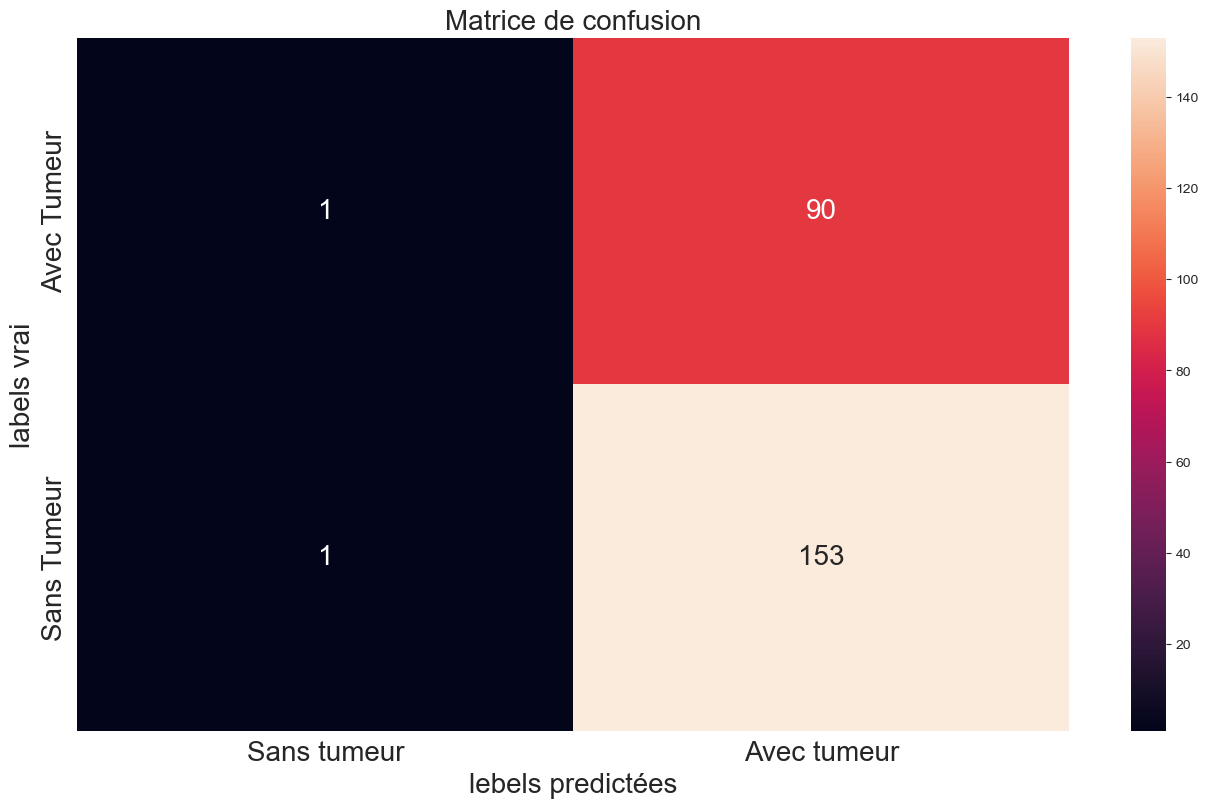

In [37]:
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, model.convertOutput(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})
ax.set_xlabel('lebels predictées', fontsize=20)
ax.set_ylabel('labels vrai', fontsize=20)
ax.set_title('Matrice de confusion', fontsize=20)
ax.xaxis.set_ticklabels(['Sans tumeur','Avec tumeur'], fontsize=20)
ax.yaxis.set_ticklabels(['Avec Tumeur','Sans Tumeur'], fontsize=20)

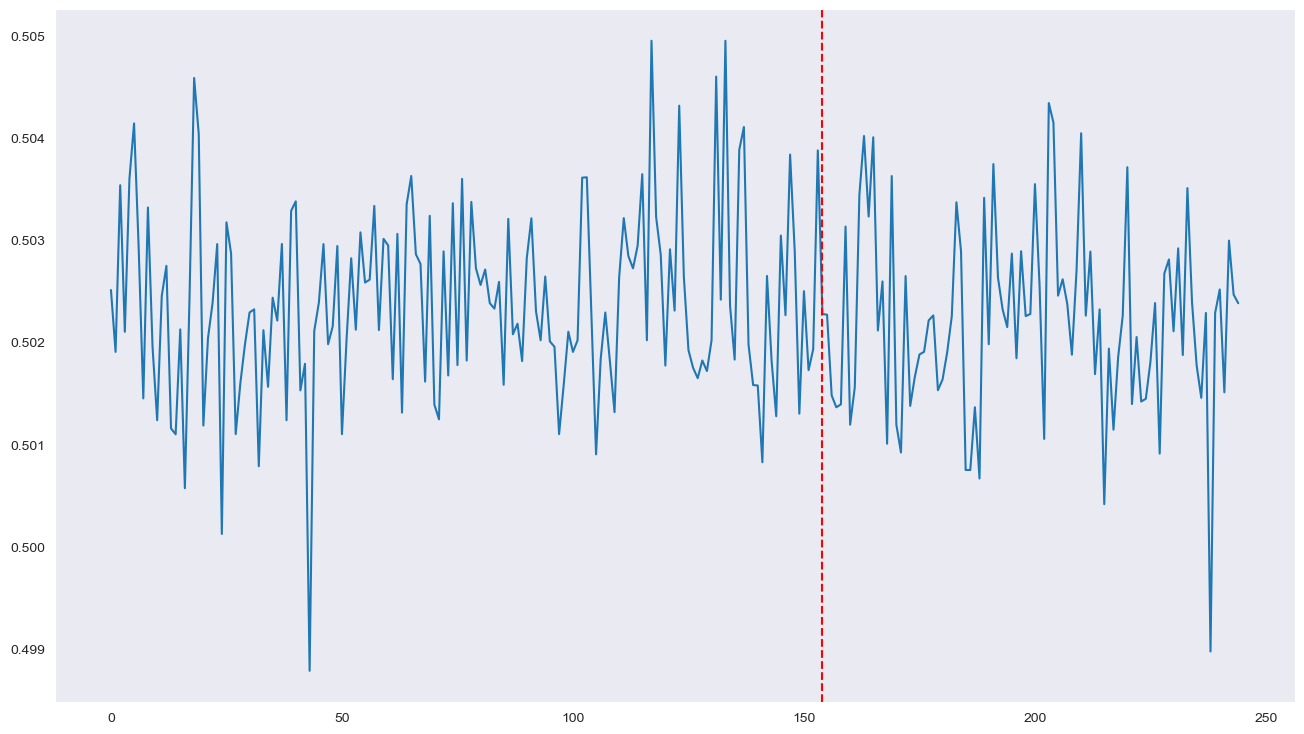

In [38]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(with_tumor), color='r', linestyle='--')
plt.grid()

### **4.2 Entrainer le nouveau modele**

In [39]:
eta = 0.0001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [40]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image']
        label = D['label']
        y_hat = model(data)
        # define loss function
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Époque d\'entraînement : {}\tPerte : {:.6f}'.format(epoch+1, np.mean(losses)))


Époque d'entraînement : 10	Perte : 0.626517
Époque d'entraînement : 20	Perte : 0.593130
Époque d'entraînement : 30	Perte : 0.555760
Époque d'entraînement : 40	Perte : 0.542271
Époque d'entraînement : 50	Perte : 0.521989
Époque d'entraînement : 60	Perte : 0.513243
Époque d'entraînement : 70	Perte : 0.497332
Époque d'entraînement : 80	Perte : 0.469438
Époque d'entraînement : 90	Perte : 0.460748
Époque d'entraînement : 100	Perte : 0.440638
Époque d'entraînement : 110	Perte : 0.422100
Époque d'entraînement : 120	Perte : 0.411613
Époque d'entraînement : 130	Perte : 0.404391
Époque d'entraînement : 140	Perte : 0.385387
Époque d'entraînement : 150	Perte : 0.377316
Époque d'entraînement : 160	Perte : 0.357570
Époque d'entraînement : 170	Perte : 0.338544
Époque d'entraînement : 180	Perte : 0.328241
Époque d'entraînement : 190	Perte : 0.313761
Époque d'entraînement : 200	Perte : 0.300582
Époque d'entraînement : 210	Perte : 0.284245
Époque d'entraînement : 220	Perte : 0.275468
Époque d'entraîneme

### **4.3 Evaluer le model entrainé**


In [41]:
model.eval()
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image']
        label = D['label']
        y_hat = model(image)
        outputs.append(y_hat)
        y_true.append(label)
outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )

In [42]:
accuracy_score(y_true, model.convertOutput(outputs))

1.0

In [43]:
cm = confusion_matrix(y_true, model.convertOutput(outputs))
plt.figure(figsize=(16,9))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('étiquettes predictés');ax.set_ylabel('étiquettes vrais');
ax.set_title('matrice de confusion');
ax.xaxis.set_ticklabels(['avec tumeur','sans tumeur'])
ax.yaxis.set_ticklabels(['avec tumeur','sans tumeur'])

[Text(0, 0.5, 'avec tumeur'), Text(0, 1.5, 'sans tumeur')]

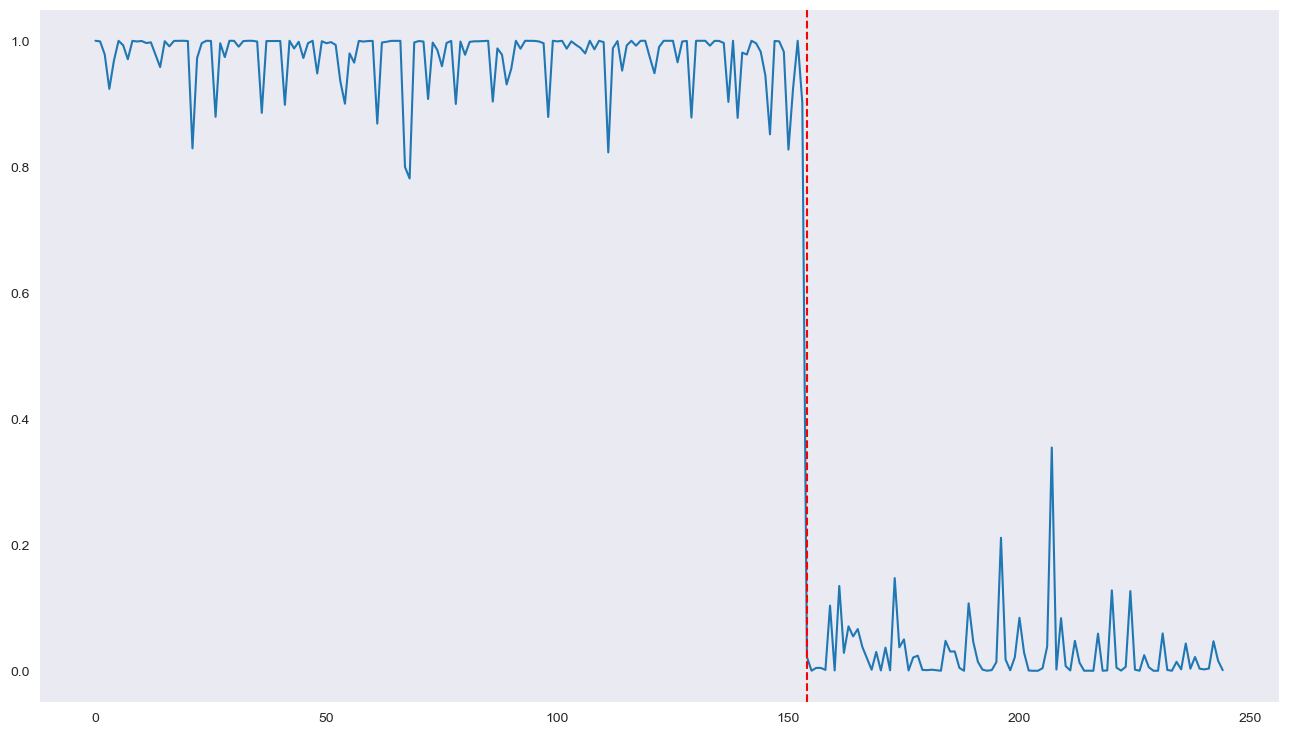

In [44]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(with_tumor), color='r', linestyle='--')
plt.grid()

# Visualising the Feature Maps of the Convolutional Filters

In [45]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [46]:
no_of_layers = 0
conv_layers = []

In [47]:
model_children = list(model.children())
model_children

[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): Tanh()
   (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
   (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (4): Tanh()
   (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
 ),
 Sequential(
   (0): Linear(in_features=256, out_features=120, bias=True)
   (1): Tanh()
   (2): Linear(in_features=120, out_features=84, bias=True)
   (3): Tanh()
   (4): Linear(in_features=84, out_features=1, bias=True)
 )]

In [48]:
for child in model_children:
    if type(child) == nn.Sequential:
        for layer in child.children():
            if type(layer) == nn.Conv2d:
                no_of_layers += 1
                conv_layers.append(layer)

In [49]:
conv_layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

In [50]:
img = dataset[100]['image']
plt.imshow(img.reshape(128,128,3))

In [51]:
img = torch.from_numpy(img)

In [52]:
img.shape

torch.Size([3, 128, 128])

In [53]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [54]:
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results

Layer  1


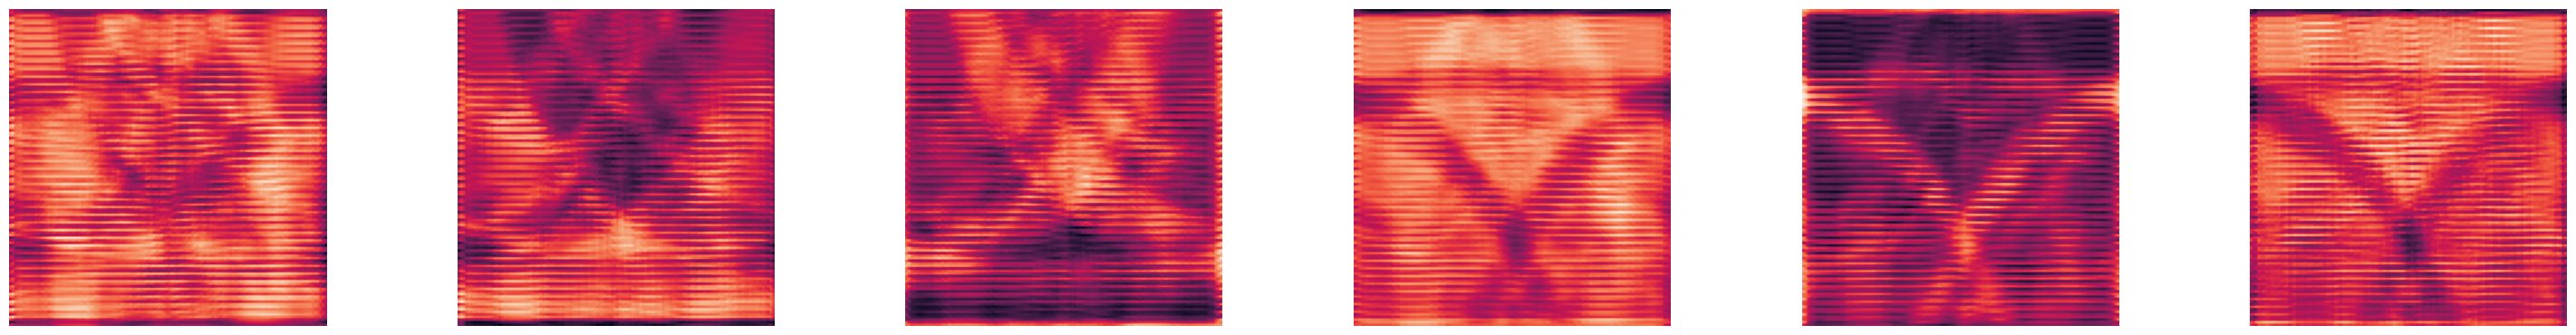

Layer  2


In [55]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer ",num_layer+1)
    for i, f in enumerate(layer_viz):
        plt.subplot(2, 8, i + 1)
        plt.imshow(f.detach().cpu().numpy())
        plt.axis("off")
    plt.show()
    plt.close()

## **Enregistrement et chargement du model**

In [68]:
PATH='./outputs/model.pt'
torch.save(model, PATH)

In [69]:
model=torch.load(PATH, weights_only=False)
